In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [18]:
df = pd.read_csv('sales_data.csv', parse_dates=['Date'], index_col='Date')
df.columns
df.head()
print('\nMissing Values')
df.isnull().sum()



Missing Values


Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [19]:
df.columns

Index(['Day', 'Month', 'Year', 'Customer_Age', 'Age_Group', 'Customer_Gender',
       'Country', 'State', 'Product_Category', 'Sub_Category', 'Product',
       'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost',
       'Revenue'],
      dtype='object')

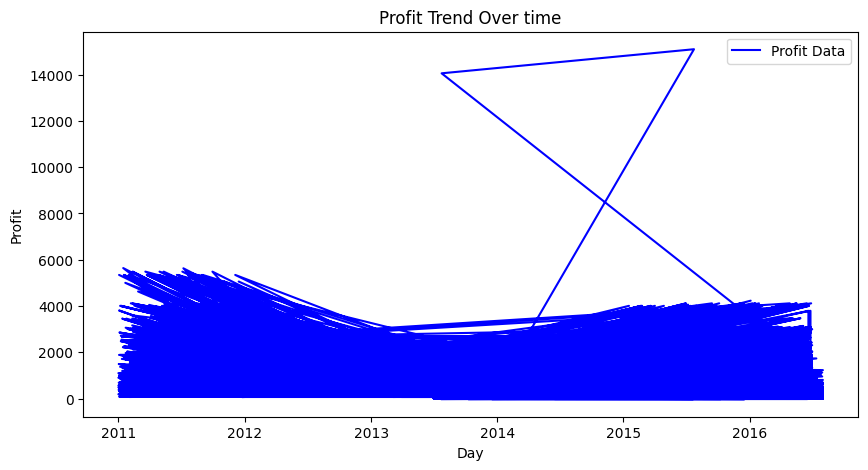

In [23]:

# Visualizing sales data
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Profit'], label= 'Profit Data', color='blue')
plt.xlabel('Day')
plt.ylabel('Profit')
plt.title('Profit Trend Over time')
plt.legend()
plt.show()

-12.192875166834794
p-value:1.2738845226686541e-22
The data is stationary


c:\Users\omshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\omshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\omshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\omshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

Forecasted Sales for next 10 periods: 113036    578.472794
113037    541.567249
113038    553.998947
113039    536.289066
113040    552.858414
113041    536.044822
113042    552.803906
113043    536.034878
113044    552.799946
113045    536.035838
Name: predicted_mean, dtype: float64


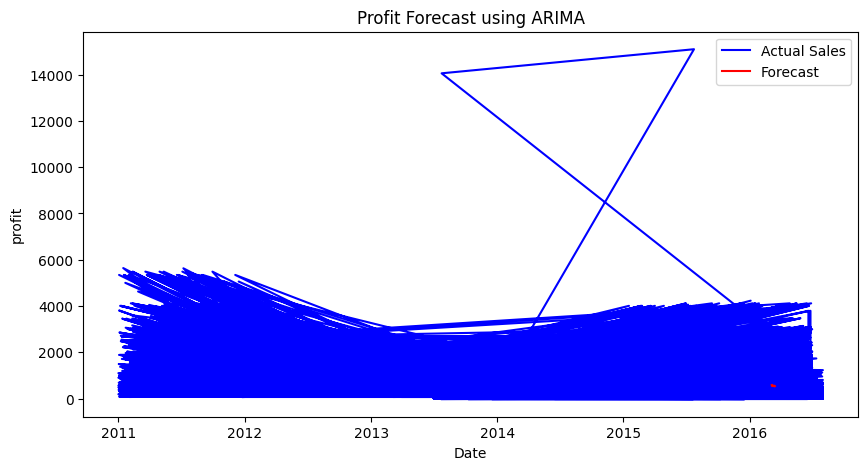

In [24]:
# Check Stationarity (Dicker - Fuller Test)

from statsmodels.tsa.stattools import adfuller

# performing the dicker-fuller test
result = adfuller(df['Profit'])
print(result[0])
print(f'p-value:{result[1]}')

if result[1] > 0.05:
    print('The data is non stationary, differencing is needed')
else:
    print('The data is stationary')


# fir ARIMA model( assume p= 2,d= 1, q= 2)
model = ARIMA(df['Profit'], order=(2,1,2))
model_fit = model.fit()

#forecast next 10 periods
forecast = model_fit.forecast(steps= 10)
print('Forecasted Sales for next 10 periods:', forecast)

# visualizing forecast
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Profit'], label= 'Actual Sales', color='blue')
plt.plot(pd.date_range(start=df.index[-1],periods = 11, freq = 'D')[1:], forecast, label= 'Forecast', color= 'red')
plt.xlabel('Date')
plt.ylabel('profit')
plt.title('Profit Forecast using ARIMA')
plt.legend()
plt.show()